# EXPLORATORY DATA ANALYSIS-RETAIL

# AUTHOR-TANIA DAS

## BUSINESS PROBLEM

A Superstore Data Set was given on which we need to perform Exploratory Data Analysis.
As a business manager, we need to find out the weak areas where we can work to make more profit.
What all business problems we can derive by exploring the data?

In [31]:
#filter out warnings
import warnings
warnings.filterwarnings("ignore")

### Importing The Necessary Libraries

In [32]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

### Setting The Working Directory

In [33]:
os.chdir(R"C:\Users\TANIA DAS\DATA PYTHON\GRIPS SPARKS FOUNDATION\Task 3")

### ReadingThe File

In [34]:
Superstore=pd.read_csv("SampleSuperstore.csv")

In [35]:
Superstore.head()#Checking the first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Exploratory Data Analysis

In [36]:
Superstore.shape # Checking the dimension of the data. There are 13 columns and 9994 rows

(9994, 13)

In [37]:
Superstore.columns # Checking the column names

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [38]:
Superstore.info() #   Checking the column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [39]:
Superstore.isnull().sum()# Checking the missing values. There are no missing valuesin the data

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [40]:
Superstore.duplicated().sum() # Checking whether my dataset has duplicate records.There are total 17 duplicate records.

17

In [41]:
Superstore=Superstore.drop_duplicates() #Dropping the  duplicated Values

In [42]:
Superstore.shape #Checking the final dimension of the data

(9977, 13)

In [43]:
Superstore.describe() # Statistical analysis

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [44]:
# To find out  Sales and Profit generated by the Superstore
print("TOTAL SALES:",Superstore['Sales'].sum())
print("TOTAL PROFIT:",Superstore['Profit'].sum())

TOTAL SALES: 2296195.5903
TOTAL PROFIT: 286241.4226


### Visualisation

### Regional Analysis

<AxesSubplot:ylabel='Region'>

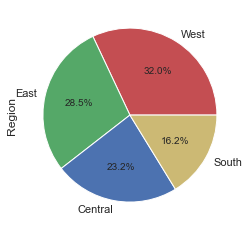

In [45]:
# Which region has the maximum transactions
Superstore['Region'].value_counts().plot.pie(colors=['r','g','b','y'],autopct="%.1f%%")

From the above Pie-Chart we can see that maximum transanctions were made in WEST region followed by EAST

Text(0.5, 1.0, 'REGION WISE SALES AND PROFIT')

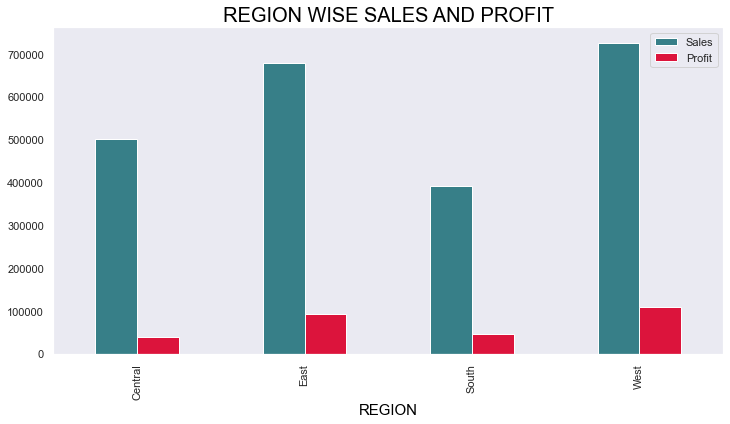

In [46]:
#Next we will check what amount of sales and profits were being made by each Region
sns.set(style='dark')
Superstore.groupby(['Region'])['Sales','Profit'].sum().plot.bar(color=['#377F88','#DC143C'],figsize=(12,6))
plt.xlabel("REGION",fontdict={'color':'black','fontsize':15})
plt.title("REGION WISE SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

From the bar plot we can see that West Region contributes maximum towards sales and profit

### Customer Analysis

Text(0.5, 1.0, 'SEGMENT WISE SALES AND PROFIT')

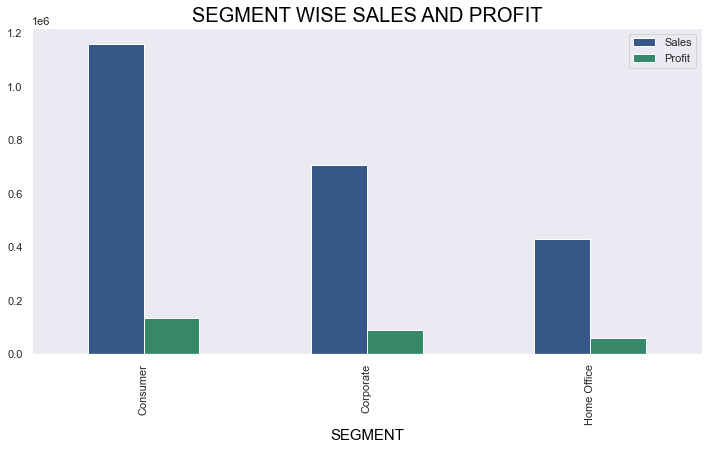

In [47]:
# To check maximum Sales and Profit in each segment
sns.set(style="dark")
Superstore.groupby(['Segment'])['Sales','Profit'].sum().plot.bar(color=['#375788','#378869'],figsize=(12,6))
plt.xlabel("SEGMENT",fontdict={'color':'black','fontsize':15})
plt.title("SEGMENT WISE SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

 From the above diagram we can see that Consumer segment is the one which has maximum buying capacity. Also they give maximum profit to Superstore whereas Home Office  contributes the least towords sales and profit

Text(0.5, 1.0, 'SEGMENT WISE SHIP MODE')

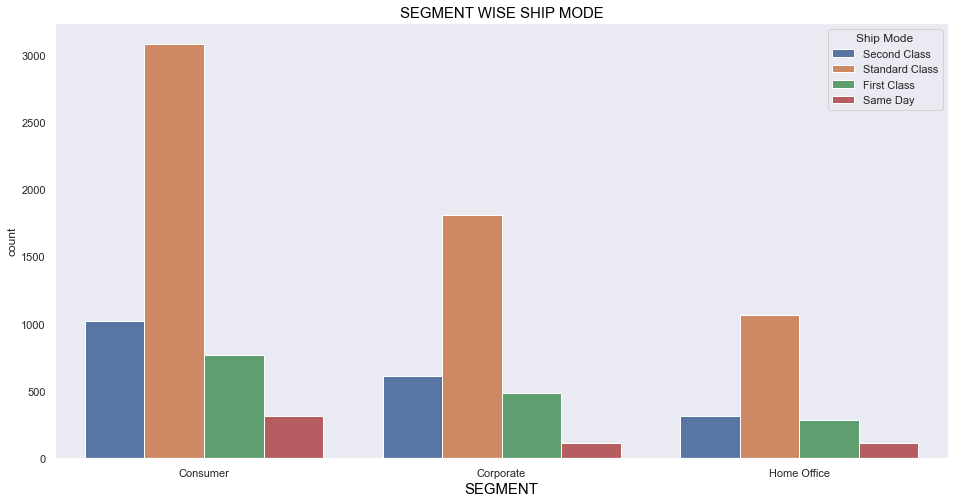

In [48]:
#Checking Ship Mode Segment wise
sns.set(style='dark')
plt.subplots(figsize=(16,8))
sns.countplot(x='Segment',hue='Ship Mode',data=Superstore)
plt.xlabel('SEGMENT',fontdict={'color':'black','fontsize':15})
plt.title("SEGMENT WISE SHIP MODE",fontdict={'color':'black','fontsize':15})

 Most of the transaction has been shipped under Standard Class

### Product Analysis

Text(0.5, 1.0, 'PRODUCT CATEGORY WISE SALES AND PROFIT')

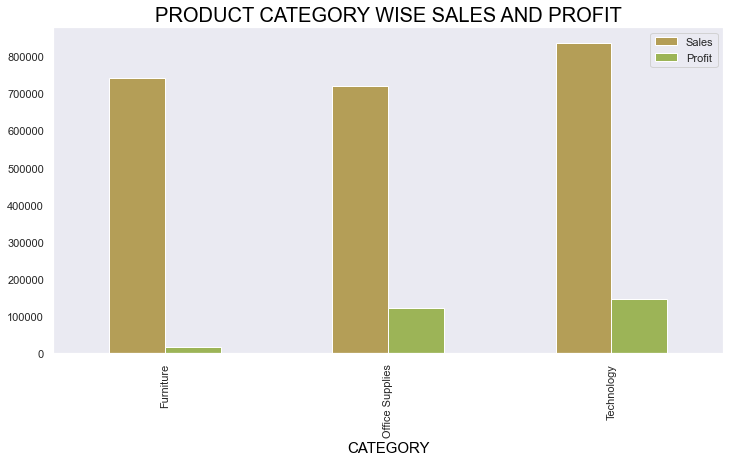

In [49]:
# To check profit and sales Product wise
sns.set(style="dark")
Superstore.groupby(['Category'])['Sales','Profit'].sum().plot.bar(color=['#b49e57','#9cb457'],figsize=(12,6))
plt.xlabel("CATEGORY",fontdict={'color':'black','fontsize':15})
plt.title("PRODUCT CATEGORY WISE SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

This Bar Plot shows that Technology has given maximum sales and subsequently Profit was also the highest. But in case of Furniture, though Sales is high, profit is the least.¶

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES AND PROFIT FOR FURNITURE')

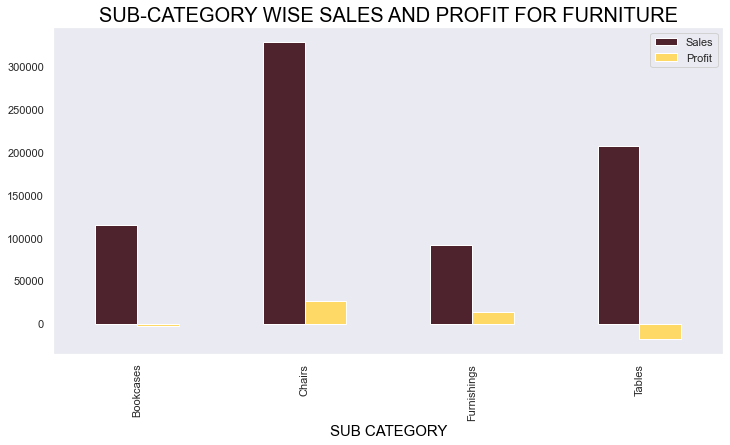

In [50]:
#Since Furniture showed an unsual trend, now looking at sales and profit for subcategories of Furniture
sns.set(style='dark')
Superstore[Superstore['Category']=='Furniture'].groupby(['Sub-Category'])['Sales','Profit'].sum().plot.bar(color=['#4E232E','#ffd966'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES AND PROFIT FOR FURNITURE",fontdict={'color':'black','fontsize':20})

So we have sub categories of Furniture which are Bookcases,Chairs,Furnishings and Tables. With this Bar Plot we can conclude that irrespective of high sales in Tables and Bookcases the store is incurring loss. This loss is affecting the whole of Furniture Category

Text(0.5, 1.0, 'DISCOUNT GIVEN IN FURNITURE CATEGORY')

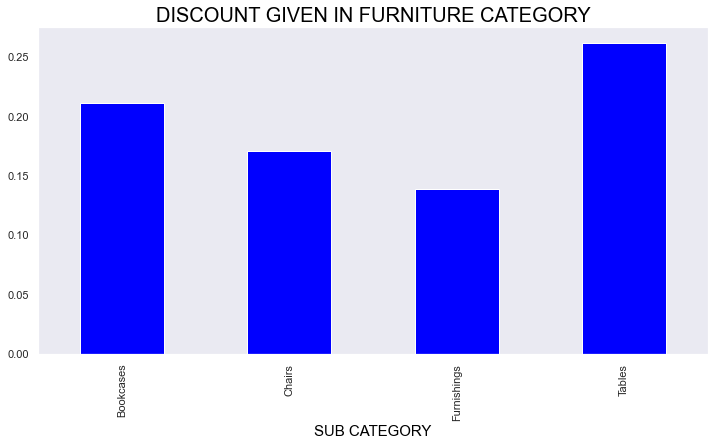

In [51]:
#Now we need to check irrespective of high sales why are we incurring loss?
#To check the probable reason of loss lets look at the discount given to each Furniture sub-category
sns.set(style='dark')
Superstore[Superstore['Category']=='Furniture'].groupby(['Sub-Category'])['Discount'].mean().plot.bar(color='#0000FF',figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.title("DISCOUNT GIVEN IN FURNITURE CATEGORY",fontdict={'color':'black','fontsize':20})

From the above bar plot we concluded that the maximum discount is given on Tables followed by Bookcases but, still the store is incurring losses from them.

In [52]:
# Finding the correlation between variables
corr_data=Superstore.corr()
display(corr_data)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

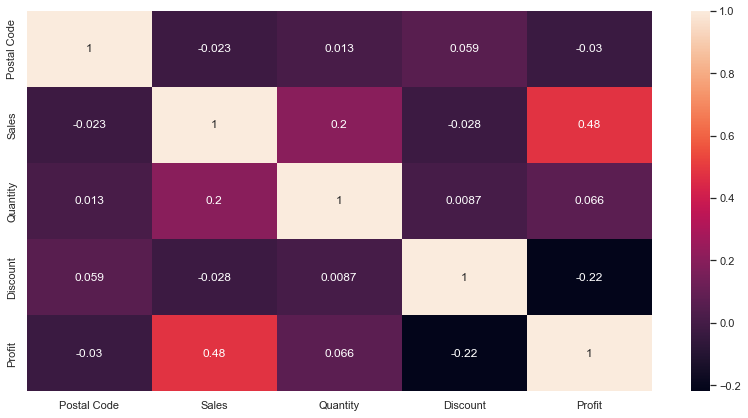

In [53]:
# Plotting the heatmap 
plt.subplots(figsize=(14,7))
sns.heatmap(corr_data,annot=True)

From above Heatmap we can conclude that there is a Negative correlation  between Profit and Discount whereas, a Positive correlation between Profit and Sales

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN SALES AND PROFIT')

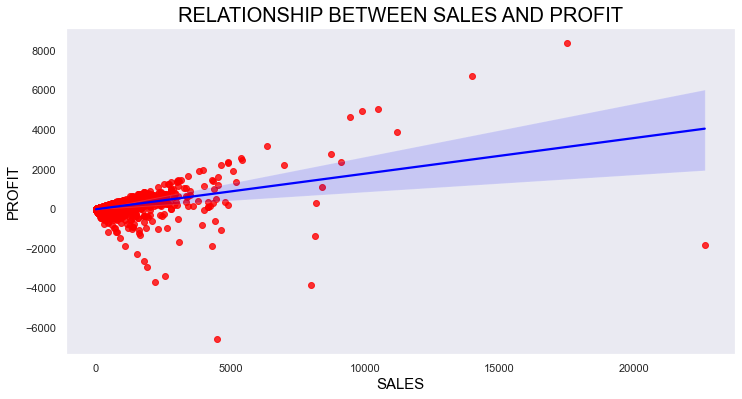

In [54]:
sns.set(style='dark')
plt.subplots(figsize=(12,6))
sns.regplot(x=Superstore['Sales'],y=Superstore['Profit'],color='red',line_kws={'color':'blue'})
plt.xlabel("SALES",fontdict={'color':'black','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("RELATIONSHIP BETWEEN SALES AND PROFIT",fontdict={'color':'black','fontsize':20})

 Again from the scatterplot we see that there is a positively sloped trendline which concludes a strong positive relationship between Sales and Profit.

### Top Products

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES')

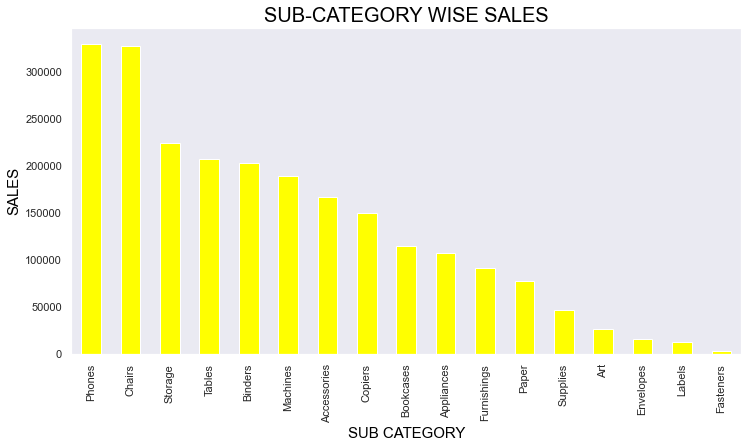

In [55]:
# Now we will check the Top Products Sold
sns.set(style='dark')
Superstore.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot.bar(color=['Yellow'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES",fontdict={'color':'black','fontsize':20})

With this we concluded that Phones,Chairs ,Storage,Tables and Binders are being sold the most. Whereas Fasteners,Labels and Envelopes were sold the least

Text(0.5, 1.0, 'SUB-CATEGORY WISE PROFIT')

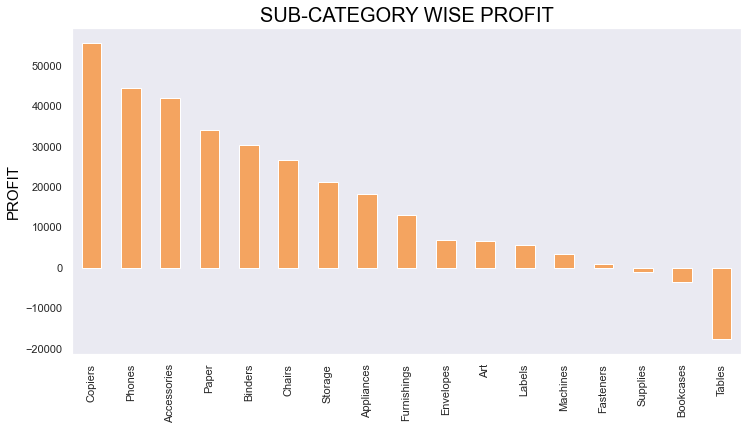

In [56]:
#To check the profit earned from all the Sub-Categories
sns.set(style='dark')
Superstore.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).plot.bar(color=['#F4A460'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE PROFIT",fontdict={'color':'black','fontsize':20})

 Here we saw Copiers, Phones, Accessories are the top profit giving products to the store whereas store is incurring losses due to Tables,Bookcases and Supplies.

### City Analysis

Text(0.5, 1.0, 'CITY WISE SALES')

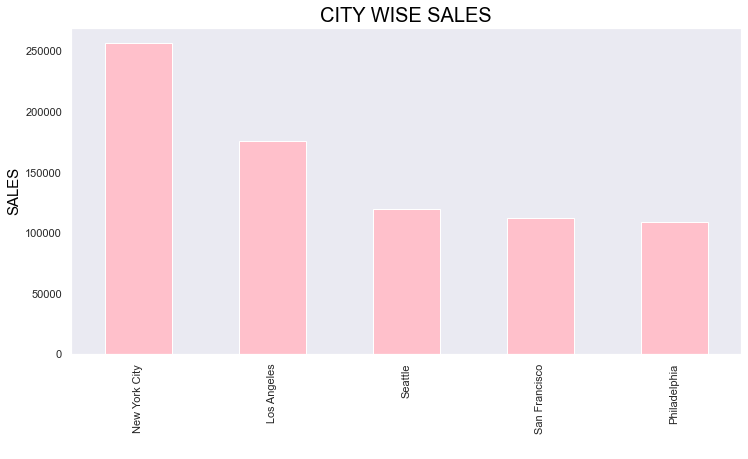

In [57]:
#To check the sales earned from the top 5 cities
sns.set(style='dark')
Superstore.groupby(['City'])['Sales'].sum().sort_values(ascending=False).head().plot.bar(color=['Pink'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'black','fontsize':15})
plt.title("CITY WISE SALES",fontdict={'color':'black','fontsize':20})

New York City has the most sales followed by Los Angeles and Seattle

Text(0.5, 1.0, 'CITY WISE PROFIT')

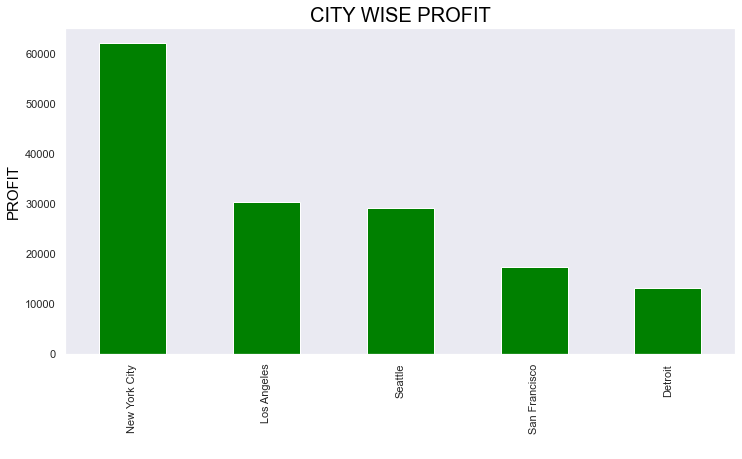

In [58]:
#To check the profit earned from the top 5 ciies
sns.set(style='dark')
Superstore.groupby(['City'])['Profit'].sum().sort_values(ascending=False).head().plot.bar(color=['Green'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("CITY WISE PROFIT",fontdict={'color':'black','fontsize':20})

Similarly most profit is earned from New York City followed by Los Angeles and Seattle.

Text(0.5, 1.0, 'CITY WISE DISCOUNT')

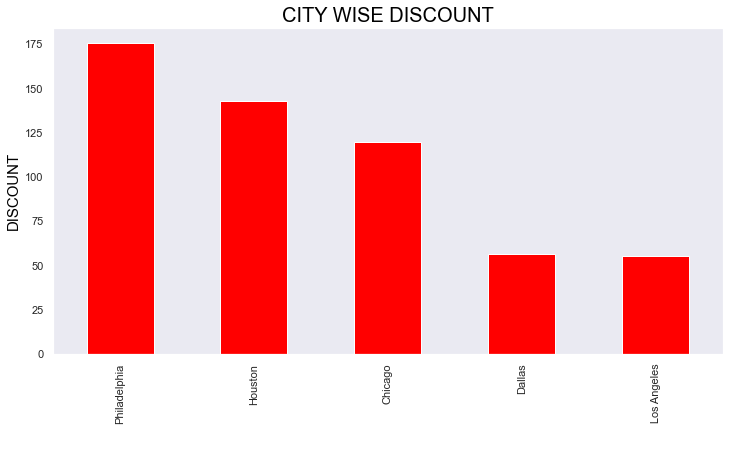

In [59]:
#To check the discount given to the top 5 ciies
sns.set(style='dark')
Superstore.groupby(['City'])['Discount'].sum().sort_values(ascending=False).head().plot.bar(color=['Red'],figsize=(12,6))
plt.xlabel("CITY",fontdict={'color':'white','fontsize':15})
plt.ylabel("DISCOUNT",fontdict={'color':'black','fontsize':15})
plt.title("CITY WISE DISCOUNT",fontdict={'color':'black','fontsize':20})

Interestingly highest total discount is for Philadelphia followed by Houston and Chicago. But they do not lead the Sales and Profit table

Text(0.5, 1.0, 'CITIES GIVING LEAST PROFIT')

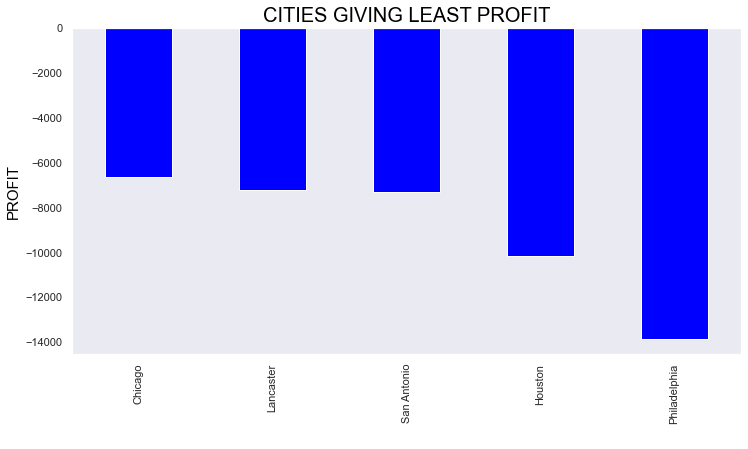

In [60]:
#To check the 5 cities that are giving me loss
sns.set(style='dark')
Superstore.groupby(['City'])['Profit'].sum().sort_values(ascending=False).tail().plot.bar(color=['Blue'],figsize=(12,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'white','fontsize':15})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("CITIES GIVING LEAST PROFIT",fontdict={'color':'black','fontsize':20})

Philadelphia followed by Houston and San Antonio the giving the least profit

### Insights

##### 1.MAXIMUM TRANSACTIONS were made in WEST REGION
##### 2.MAXIMUM SALES in WEST REGION
##### 3.MAXIMUM PROFITS in WEST REGION
##### 4.MAXIMUM SALES AND PROFIT in CONSUMER SEGMENT
##### 5.MAXIMUM TRANSACTIONS were shipped in STANDARD CLASS irrespective of SEGMENT
##### 6.LEAST PROFIT is incurred in FURNITURE CATEGORY irrespective of good amount of Sales
##### 7.Under FURNITURE, TABLES and BOOKCASES are INCURRING LOSSES which is effecting the TOTAL PROFIT of Furniture Category
##### 8.HIGH DISCOUNT is being offered in TABLES and BOOKCASES which is somewhere the probable reason of losses.
##### 9. City Contributing to the maximum profit and sales is NEW YORK City
##### 10. Maximum discount is given in the city  of Philadelphia
##### 11. Philadelphia contributes least towards profit
##### 12.POSITIVE CORRELATION:Profit and Sales
##### 13.NEGATIVE CORRELATION:Profit and Discount
##### 14.LESS the DISCOUNT ,MORE the PROFIT and vice-versa

### Conclusion

##### From Above Observation we conclude that FURNITURE CATEGORY is the WEAK AREA where we need to work upon. As in Furniture we have TABLES and BOOKCASES where due to HIGH DISCOUNT offered we are incurring LOSSES. So we need to REDUCE the DISCOUNT in order to INCREASE the PROFIT.

##### Maximum discounts are given to Philadelphia followed by Houston and Chicago.Despite this fact Philadelphia is contributing the least towards profit followed by Houston so we can reduce the discounts given to this cities.